# 1. Make one single PSNR plot from several log.txt files

The code below will read the log files (e.g. in .txt format) inside the folder provided as log_folder, corresponding from different training sessions and named with a prefix and suffix structure provided, load them into a single dataframe as a continuous single training, and plot it.

For example, for the log files:
* log-training1.txt
* log-training2.txt
* log-training3.txt

The suffix would be "training", the prefix would be "log-training", the extension ".txt".

     Epoch    PSNR
0        1  26.368
1        2  26.414
2        3  26.424
3        4  26.448
4        5  26.435
..     ...     ...
195    196  26.558
196    197  26.555
197    198  26.551
198    199  26.564
199    200  26.556

[200 rows x 2 columns]


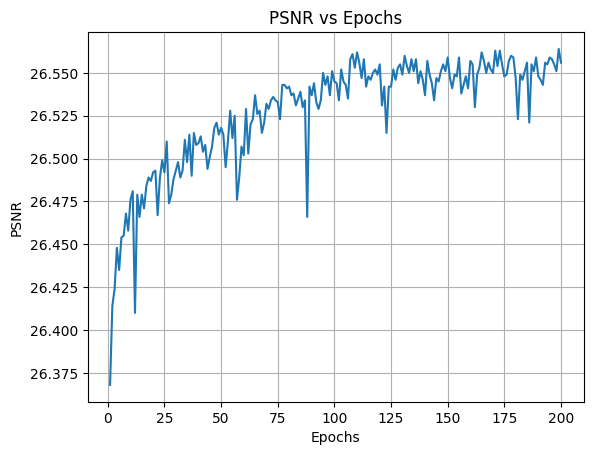

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder with the log files
log_folder = os.getcwd()

# Log files specifications
log_extension = ".txt"
log_suffix = "t"
log_prefix = f"log-{log_suffix}"

# Initialize empty lists and dicts to store data
epoch_list = []
psnr_list = []
log_labels_list = []
epoch_dict = {}
psnr_dict = {}

# Iterate over all log files in the folder
for filename in os.listdir(log_folder):
  if filename.endswith(log_extension) and filename.startswith(log_prefix):
    log_file_path = os.path.join(log_folder, filename)

    # Get label from the log file
    log_label = int(filename.split(log_suffix)[1].split(".")[0])
    log_labels_list.append(log_label)

    # Make lists for each file
    epochs = []
    psnrs = []

    # Read the file line by line
    with open(log_file_path, "r") as file:
        lines = file.readlines()

    # Process the lines to extract Epoch and PSNR information
    for line in lines:
      if "[Epoch" in line:
        epoch = int(line.split()[1].replace("]", ""))
        epochs.append(epoch)
      if "PSNR:" in line:
        psnr = float(line.split(":")[1].split()[0])
        psnrs.append(psnr)

    # Add lists to the dicts
    epoch_dict[log_label] = epochs
    psnr_dict[log_label] = psnrs

# Compile results in a single list
log_labels_list.sort()

for label in log_labels_list:
  epoch_list.extend(epoch_dict[label])
  psnr_list.extend(psnr_dict[label])

# Create a DataFrame
df = pd.DataFrame({"Epoch": epoch_list, "PSNR": psnr_list})
df["Epoch"] = df.index + 1           #Adjust the global value of the Epochs

# Print the DataFrame
print(df)

# Plotting
plt.plot(df['Epoch'], df['PSNR'], linestyle='-')
plt.title('PSNR vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('PSNR')
plt.grid(True)

# Save and show the plot
plot_name = "PSNR_vs_Epochs.png"
plot_path = os.path.join(log_folder, plot_name)
plt.savefig(plot_path)
plt.show()

# 2. Compare 2 learning curves from different trainings in a single PSNR vs Epochs plot

If we have several log files from one training session and we want to plot its corresponding full learning curve with the full learning curve from another training session that also has several log files, we can use the code below.

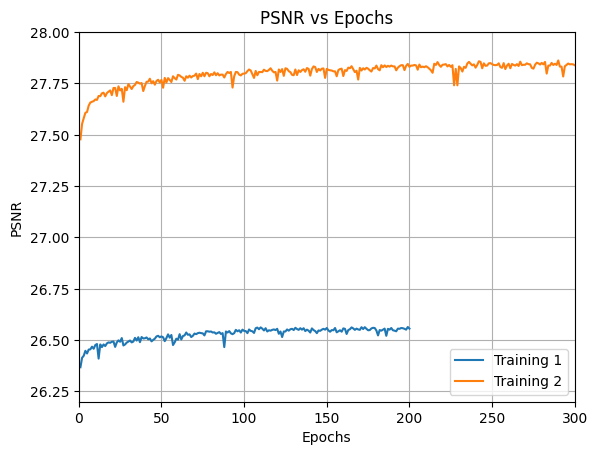

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder with the log files
log_folder = os.getcwd()

# Log files specifications
log_extension = ".txt"
log_suffixes = ["t", "png"]
log_labels = ["Training 1", "Training 2"]

# Dataframes dictionary
df_dict = { label: "" for label in log_labels }

# Iterate over each log suffix
for idx,log_suffix in enumerate(log_suffixes):
  # Log prefix
  log_prefix = f"log-{log_suffix}"

  # Initialize empty lists and dicts to store data
  epoch_list = []
  psnr_list = []
  log_labels_list = []
  epoch_dict = {}
  psnr_dict = {}

  # Iterate over all log files in the folder
  for filename in os.listdir(log_folder):
    if filename.endswith(log_extension) and filename.startswith(log_prefix):
      log_file_path = os.path.join(log_folder, filename)

      # Get label from the log file
      log_label = int(filename.split(log_suffix)[1].split(".")[0])
      log_labels_list.append(log_label)

      # Make lists for each file
      epochs = []
      psnrs = []

      # Read the file line by line
      with open(log_file_path, "r") as file:
          lines = file.readlines()

      # Process the lines to extract Epoch and PSNR information
      for line in lines:
        if "[Epoch" in line:
          epoch = int(line.split()[1].replace("]", ""))
          epochs.append(epoch)
        if "PSNR:" in line:
          psnr = float(line.split(":")[1].split()[0])
          psnrs.append(psnr)

      # Add lists to the dicts
      epoch_dict[log_label] = epochs
      psnr_dict[log_label] = psnrs

  # Compile results in a single list
  log_labels_list.sort()

  for label in log_labels_list:
    epoch_list.extend(epoch_dict[label])
    psnr_list.extend(psnr_dict[label])

  # Create a DataFrame
  df = pd.DataFrame({"Epoch": epoch_list, "PSNR": psnr_list})
  df["Epoch"] = df.index + 1           #Adjust the global value of the Epochs

  # Assign corresponding dataframe to the dictionary
  label = log_labels[idx]
  df_dict[label] = df


# Plotting
for df in df_dict.values():
  plt.plot(df['Epoch'], df['PSNR'], linestyle='-')
plt.title('PSNR vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('PSNR')
plt.legend(log_labels, loc='lower right')
plt.xlim(0, 300)
plt.ylim(26.2, 28)
plt.grid(True)

# Save and show the plot
plot_name = "PSNR_vs_Epochs_comparison.png"
plot_path = os.path.join(log_folder, plot_name)
plt.savefig(plot_path)
plt.show()

## 2.1 Comparison with two different X-axes

If we want the comparison to have different horizontal axes, one for each training, we can do load them into df_dict with the code above and then plot them with the code below.

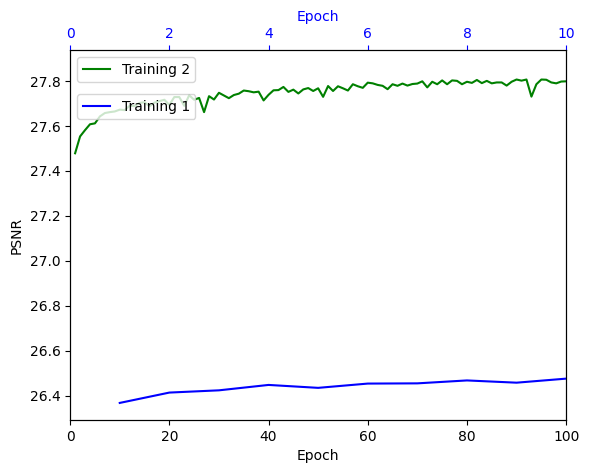

In [10]:
# Assigning dataframes
top_label = "Training 1"
bottom_label = "Training 2"
top_df = df_dict[top_label]
bottom_df = df_dict[bottom_label]

# Create a new figure and axes for the bottom dataframe
fig, ax1 = plt.subplots()

# Plot the bottom dataframe on the primary y-axis
ax1.plot(bottom_df['Epoch'], bottom_df['PSNR'], label=bottom_label, color='green')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('PSNR')
ax1.set_xlim(0, 100)  # Adjust the limits accordingly


# Create a secondary x-axis sharing the same y-axis for the top dataframe
ax2 = ax1.twiny()

# Plot the top dataframe on the secondary x-axis
ax2.plot(top_df['Epoch'], top_df['PSNR'], label=top_label, color='blue')
ax2.set_xlabel('Epoch', color='blue')
ax2.tick_params('x', colors='blue')
ax2.set_xlim(0, 10)  # Adjust the limits accordingly


# Add legends for each line
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

# Save and show the plot
plot_name = "PSNR_vs_Epochs_two_axes.png"
plot_path = os.path.join(log_folder, plot_name)
plt.savefig(plot_path)
plt.show()

# 3. Special case (training in batches)

This section contains the code used to make sepcial case of the plot of the training in batches.

In [14]:
# Load log files for training on pathomics dataset with EDSR-PyTorch-copy on dataframes

import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to convert a log file into a dataframe
def logfile_to_df(log_file_path):
  # Make list for values
  epochs = []
  psnrs = []

  # Read the file line by line
  with open(log_file_path, "r") as file:
      lines = file.readlines()

  # Process the lines to extract Epoch and PSNR information
  for line in lines:
    if "[Epoch" in line:
      epoch = int(line.split()[1].replace("]", ""))
      epochs.append(epoch)
    if "PSNR:" in line:
      psnr = float(line.split(":")[1].split()[0])
      psnrs.append(psnr)

  # Create a DataFrame
  df = pd.DataFrame({"Epoch": epochs, "PSNR": psnrs})

  return df

#Function to find best PSNR value and at what Epoch in a log file
def find_best_psnr_in_logfile(log_file_path):
  # List of values
  psnr_best_list = []
  epoch_best_list = []

  # Read the file line by line
  with open(log_file_path, "r") as file:
      lines = file.readlines()

  # Process the lines to extract Epoch and PSNR information
  for line in lines:
    if "(Best:" in line:
      psnr_and_epoch = line.split("(Best: ")[1]
      # Get PSNR
      psnr_best = float(psnr_and_epoch.split()[0])
      psnr_best_list.append(psnr_best)
      # Get Epoch
      epoch_best = int(psnr_and_epoch.split()[-1].replace(")", ""))
      epoch_best_list.append(epoch_best)

  # Get the last values from the lists
  psnr_best = psnr_best_list[-1]
  epoch_best = epoch_best_list[-1]

  return psnr_best, epoch_best


################################################################################
# Folder with the log files
log_folder = os.getcwd()

# Log files parameters
logfile_prefix = "log-patho-copy"
logfile_extension = ".txt"
logfile_sep = logfile_prefix[3:]

# Initialize empty lists and dicts to store data
df_dict = {}
log_labels_list = []
psnr_max_dict = {}
epoch_max_dict = {}

# Iterate over all log files in the folder
for filename in os.listdir(log_folder):
  if filename.endswith(logfile_extension) and filename.startswith(logfile_prefix):
    log_file_path = os.path.join(log_folder, filename)

    # Get label from the log file
    log_label = int(filename.split(logfile_sep)[1].split(".")[0])
    log_labels_list.append(log_label)

    # Make df from log file
    df_dict[log_label] = logfile_to_df(log_file_path)

    # Find best PSNR value per file, and at what Epoch
    psnr_max_dict[log_label], epoch_max_dict[log_label] = find_best_psnr_in_logfile(log_file_path)


# Sort list and dictionaries by label
df_dict = dict(sorted(df_dict.items()))
print(f"df_dict keys: {df_dict.keys()}")
log_labels_list = list(sorted(log_labels_list))
print(f"Log labels: {log_labels_list}")
psnr_max_dict = dict(sorted(psnr_max_dict.items()))
print(f"Best PSNRs: {psnr_max_dict.values()}")
epoch_max_dict = dict(sorted(epoch_max_dict.items()))
print(f"At Epochs: {epoch_max_dict.values()}")

"""
# Print the DataFrames heads
for label, df in df_dict.items():
  print(f"label: {label}, epochs: {len(df['Epoch'])}, df.head():")
  print(df.head())
"""

df_dict keys: dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
Log labels: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Best PSNRs: dict_values([24.875, 22.99, 25.343, 25.987, 30.001, 22.775, 23.306, 28.375, 23.253, 25.353, 25.843, 24.39, 23.473])
At Epochs: dict_values([24, 14, 12, 10, 23, 12, 14, 34, 8, 9, 12, 18, 14])


'\n# Print the DataFrames heads\nfor label, df in df_dict.items():\n  print(f"label: {label}, epochs: {len(df[\'Epoch\'])}, df.head():")\n  print(df.head())\n'

In [15]:
# Adjust the values of the Epochs for the dataframes
"""
This adjustment is assuming that each subsequent training was performed starting
from the state dictionary of the previous training that produced the highest
value of PSNR.

E.g. if training 1 obtained best results at epoch 24 out of 100, then training 2
started from that moment, and it's first epoch would be actually the global
epoch 25.
"""
carried_epoch = 0
#exception_labels = [7, 8, 10, 11, 13]
exception_labels = []

# Iterate from the second log file onwards
for label in log_labels_list[1:] :
  # Get best PSNR value and at what Epoch from previous training log file
  previous_max_psnr = psnr_max_dict[label-1]
  previous_max_epoch = epoch_max_dict[label-1]

  # Print values
  print(f"logfile: {label}, previous_max_psnr: {previous_max_psnr} at epoch: {previous_max_epoch}")

  # Adjust global epoch value accordingly
  carried_epoch += previous_max_epoch

  if label in exception_labels :
    carried_epoch -= previous_max_epoch

  df_dict[label]["Epoch"] += carried_epoch
  print(f'updated df head: {list(df_dict[label].head()["Epoch"])}')

logfile: 2, previous_max_psnr: 24.875 at epoch: 24
updated df head: [25, 26, 27, 28, 29]
logfile: 3, previous_max_psnr: 22.99 at epoch: 14
updated df head: [39, 40, 41, 42, 43]
logfile: 4, previous_max_psnr: 25.343 at epoch: 12
updated df head: [51, 52, 53, 54, 55]
logfile: 5, previous_max_psnr: 25.987 at epoch: 10
updated df head: [61, 62, 63, 64, 65]
logfile: 6, previous_max_psnr: 30.001 at epoch: 23
updated df head: [84, 85, 86, 87, 88]
logfile: 7, previous_max_psnr: 22.775 at epoch: 12
updated df head: [96, 97, 98, 99, 100]
logfile: 8, previous_max_psnr: 23.306 at epoch: 14
updated df head: [110, 111, 112, 113, 114]
logfile: 9, previous_max_psnr: 28.375 at epoch: 34
updated df head: [144, 145, 146, 147, 148]
logfile: 10, previous_max_psnr: 23.253 at epoch: 8
updated df head: [152, 153, 154, 155, 156]
logfile: 11, previous_max_psnr: 25.353 at epoch: 9
updated df head: [161, 162, 163, 164, 165]
logfile: 12, previous_max_psnr: 25.843 at epoch: 12
updated df head: [173, 174, 175, 176, 

idx: 1 | Epoch min: 1 | Epoch max: 25
idx: 2 | Epoch min: 25 | Epoch max: 39
idx: 3 | Epoch min: 39 | Epoch max: 51
idx: 4 | Epoch min: 51 | Epoch max: 61
idx: 5 | Epoch min: 61 | Epoch max: 84
idx: 6 | Epoch min: 84 | Epoch max: 96
idx: 7 | Epoch min: 96 | Epoch max: 110
idx: 8 | Epoch min: 110 | Epoch max: 144
idx: 9 | Epoch min: 144 | Epoch max: 152
idx: 10 | Epoch min: 152 | Epoch max: 161
idx: 11 | Epoch min: 161 | Epoch max: 173
idx: 12 | Epoch min: 173 | Epoch max: 191
idx: 13 | Epoch min: 191 | Epoch max: 230


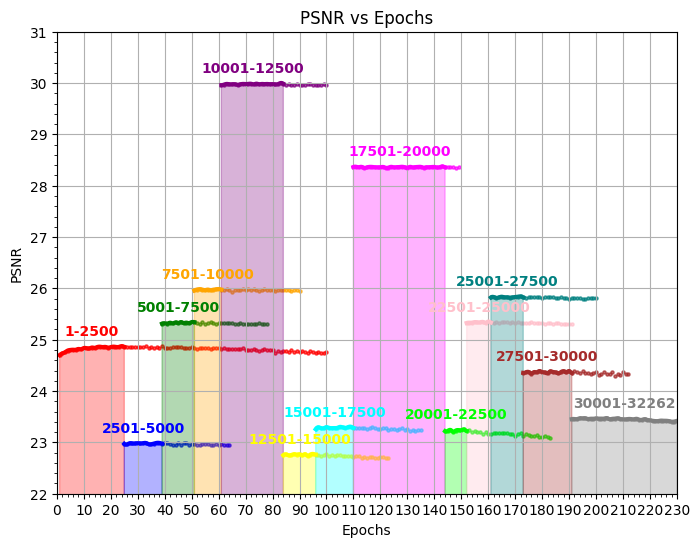

In [16]:
# Plot the values from the log files for training on pathomics dataset with EDSR-PyTorch-copy from the dataframes

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Function to plot data with scatter points, a smooth curve and filling the space beneath it
def plot_scatter_points_with_smooth_curve(data_x, data_y, fill_area=True, x_min="", x_max="", **kwargs) :
  # Read keyword arguments
  color = kwargs.get('color', 'black')                # Default color of the plot
  label = kwargs.get('label', 'Dataset')              # Default label of the plot
  s = kwargs.get('scatter_size', 100)                 # Default size of scatter points
  alpha_scatter = kwargs.get('alpha_scatter', 0.7)    # Default alpha value for the scatter points
  linewidth = kwargs.get('linewidth', 2)              # Default line width for the smooth curve
  alpha_fill = kwargs.get('alpha_fill', 0.3)          # Default alpha value for the filled area
  density_points = kwargs.get('density_points', 100)  # Default number of points for the smooth curve

  # Plot the scatter points
  plt.scatter(data_x, data_y, color=color, label=label, s=s, alpha=alpha_scatter)
  # Add a smooth curve
  if not x_min: x_min = data_x.min()
  if not x_max: x_max = data_x.max()
  data_x_smooth = np.linspace(x_min, x_max, density_points)                 # get x-axis values for the curve
  curve_function = make_interp_spline(data_x, data_y)                       # define spline function
  data_y_smooth = curve_function(data_x_smooth)                             # get y-axis values for the curve from the spline function
  plt.plot(data_x_smooth, data_y_smooth, color=color, linewidth=linewidth)  # plot the smooth curve
  # Fill the space between the smooth curve and the X-axis
  if fill_area :
    plt.fill_between(data_x_smooth, data_y_smooth, color=color, alpha=alpha_fill)

  return

# Function to write text on plot
def add_text_to_plot(text="", x_pos=0, y_pos="", **kwargs):
  # Read keyword arguments
  ha = kwargs.get("hor_align", "center")    # Default value of horizontal alignment
  va = kwargs.get("ver_align", "top")       # Default value of vertical alignment
  fontsize = kwargs.get("fontsize", 12)     # Default value of font size
  color = kwargs.get("color", "black")      # Default value of font size
  weight = kwargs.get("weight", "bold")     # Default value of font size

  # Get vertical position
  if not y_pos:
    y_pos = plt.gca().get_ylim()[0]

  # Write text
  plt.text(x_pos, y_pos, text, ha=ha, va=va, fontsize=fontsize, color=color, weight=weight)

  return

################################################################################
# Parameters
  # Data parameters
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan',
          'magenta', 'lime', 'pink', 'teal', 'brown', 'gray']
labels = ['1-2500','2501-5000','5001-7500','7501-10000','10001-12500','12501-15000','15001-17500',
          '17501-20000','20001-22500','22501-25000','25001-27500','27501-30000','30001-32262']
# Axes parameters
x_axis_min = 0
x_axis_max = 230
x_major_ticks = 10
y_axis_min = 22
y_axis_max = 31
y_major_ticks = 1
  # Plot parameters
fill_area = True
scatter_size = 5
alpha_scatter=0.7
linewidth=3
alpha_fill=0.3
  # Text parameters
fontsize = 10
ver_displacement = 0.15


# Plotting
plt.figure(figsize=(8, 6))

# Plot datasets
for idx in log_labels_list :
  # Data
  epochs = df_dict[idx]["Epoch"]
  psnrs = df_dict[idx]["PSNR"]
  # Find boundaries for the data-range
  x_min = epochs.min()
  if idx != log_labels_list[-1]:
    x_max = df_dict[idx+1]["Epoch"].min()
  else :
    x_max = epochs.max()
  # Consider the exceptions (training was bad)
  if idx+1 in exception_labels :
    x_max = epochs.max()
  # Make the plot
  plot_scatter_points_with_smooth_curve(data_x=epochs, data_y=psnrs,
                                        fill_area=fill_area, x_min=x_min, x_max=x_max,
                                        color=colors[idx-1], label=labels[idx-1],
                                        scatter_size=scatter_size, alpha_scatter=alpha_scatter,
                                        linewidth=linewidth, alpha_fill=alpha_fill)
  # Add text
  text_to_add = labels[idx-1]
  print(f"idx: {idx} | Epoch min: {x_min} | Epoch max: {x_max}")
  x_pos = (x_max + x_min)/2
  y_top = df_dict[idx]["PSNR"].max()
  y_pos = y_top + ver_displacement
  add_text_to_plot(text=text_to_add, x_pos=x_pos, y_pos=y_pos, color=colors[idx-1],
                   ver_align="bottom", fontsize=fontsize)


# Plot axes and configuration
plt.xlabel('Epochs')
plt.ylabel('PSNR')
plt.title('PSNR vs Epochs')
#plt.legend()
plt.grid(True)
plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)

# Set ticks for x and y axes
plt.xticks(np.arange(x_axis_min, x_axis_max+0.1, x_major_ticks))
plt.yticks(np.arange(y_axis_min, y_axis_max+0.1, y_major_ticks))
plt.axhline(0)

# Set minor ticks invisible
#plt.minorticks_off()
plt.minorticks_on()
#plt.grid(which='minor', axis='x', linestyle='--')

# Save and show the plot
plot_name = "PSNR_vs_Epochs_pathomics_in_batches.png"
plot_path = os.path.join(log_folder, plot_name)
plt.savefig(plot_path)
plt.show()